In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # for the subplots

import pandas as pd
import seaborn as sns

import matplotlib_inline.backend_inline

### 14 - 1

In [2]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url,index_col=0,skiprows=1)

# let's have a look
data

/Users/marklee/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
2011-02-16,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
2011-02-17,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
2011-02-18,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938


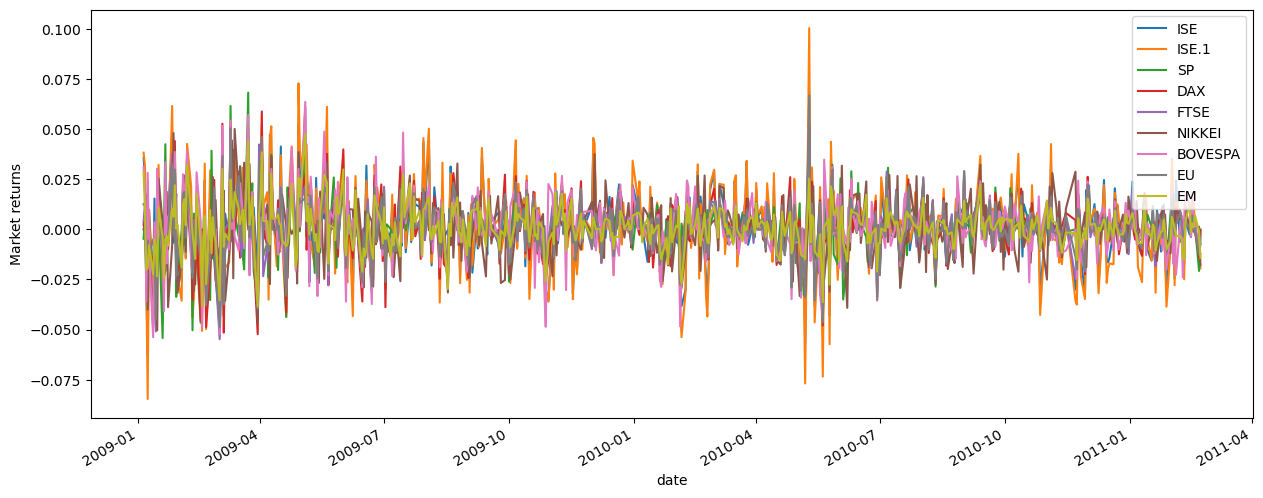

In [3]:
data.plot(figsize=(15,6),ylabel='Market returns')
plt.show()

/Users/marklee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


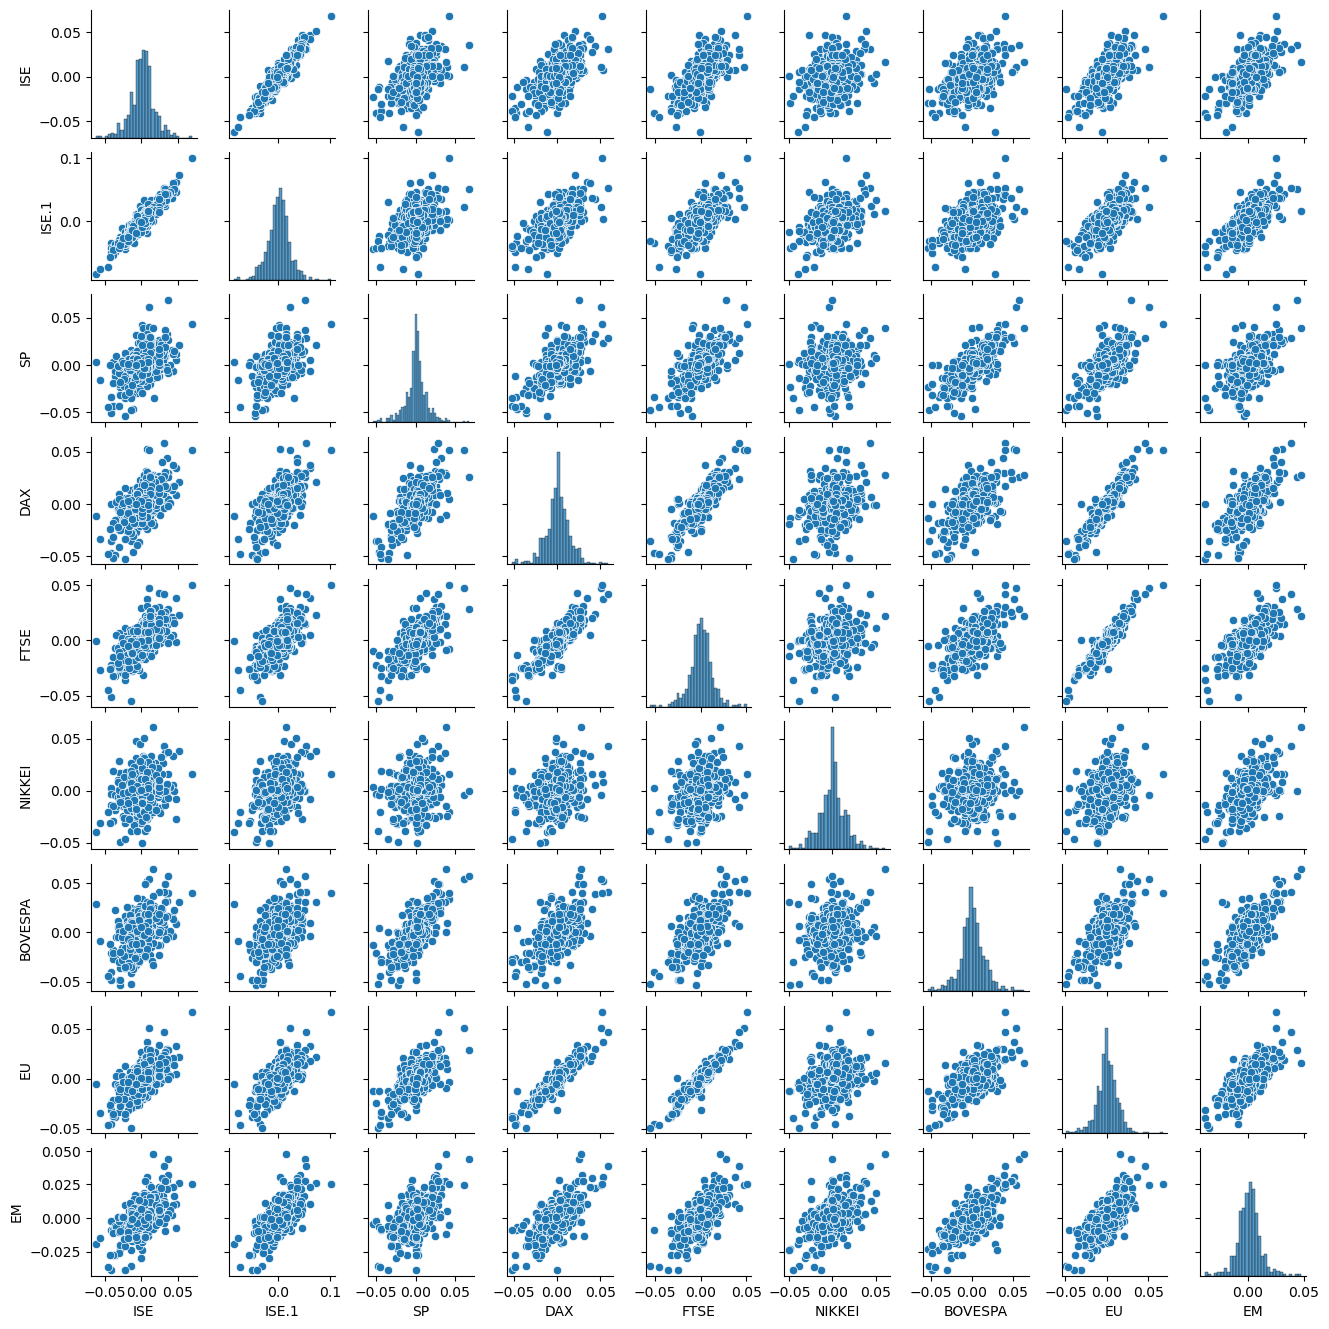

In [5]:
sns.pairplot(data,height=1.5)
plt.show()

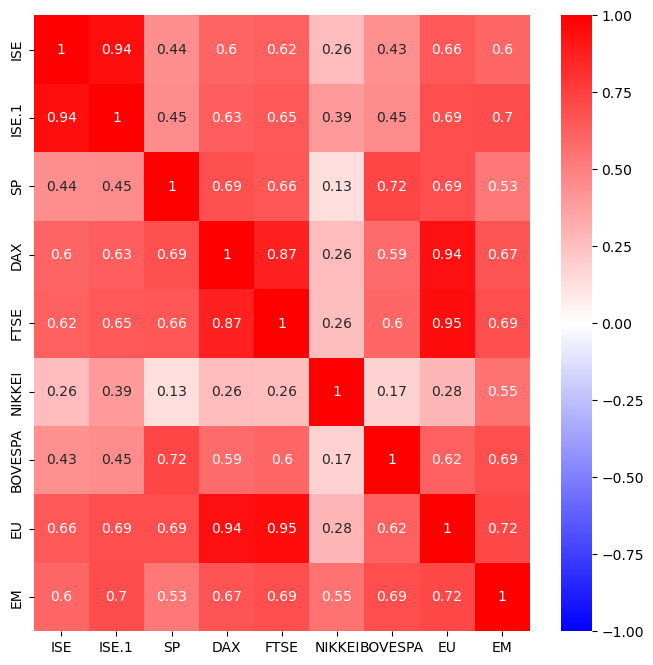

In [6]:
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap='bwr')
plt.show()

In [7]:
X = data.values
X

array([[ 0.03575371,  0.03837619, -0.00467931, ...,  0.03119023,
         0.01269804,  0.02852446],
       [ 0.02542587,  0.03181274,  0.00778674, ...,  0.01891958,
         0.01134065,  0.00877264],
       [-0.02886173, -0.02635297, -0.03046913, ..., -0.03589858,
        -0.0170728 , -0.02001541],
       ...,
       [ 0.00019097, -0.0016526 ,  0.00192291, ...,  0.00562792,
         0.00057157,  0.00693787],
       [-0.01306904, -0.01370599, -0.02074215, ..., -0.01194168,
        -0.01261533, -0.00095774],
       [-0.00724632, -0.01944185,  0.        , ..., -0.01225155,
        -0.00546489, -0.01429693]])

In [10]:
X = X - np.mean(X,axis = 0, keepdims = True)
print(X.shape)

(536, 9)


In [11]:
covmat = X.T@X / (X.shape[0]-1)

['AppleGothic']


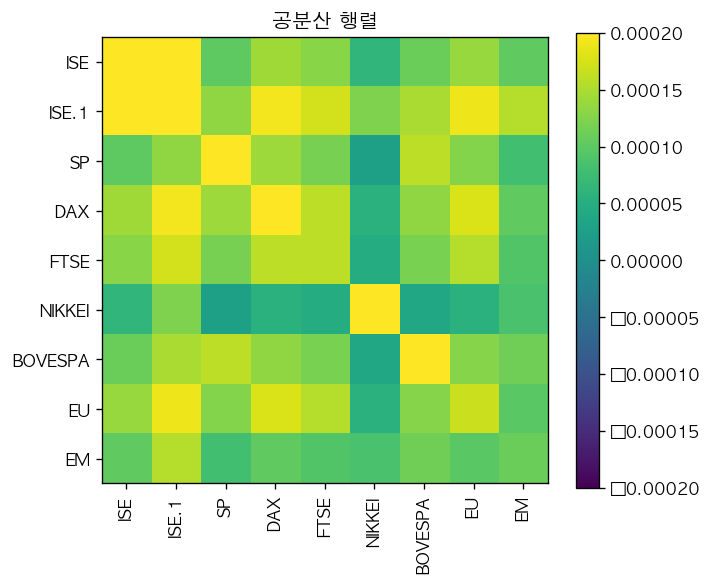

In [14]:
plt.rcParams['font.family'] = 'AppleGothic'
print(plt.rcParams['font.family'])

plt.rcParams.update({'font.family' : 'AppleGothic', #한글 폰트
                   'figure.dpi' : '120', #해상도
                   'figure.figsize' : [6.5, 6]}) # 가로 세로 크기

plt.figure(figsize=(6,6))
plt.imshow(covmat,vmin=-.0002,vmax=.0002)
plt.colorbar(shrink=.82)
plt.title('공분산 행렬')
plt.xticks(range(X.shape[1]),labels=data.columns,rotation=90)
plt.yticks(range(X.shape[1]),labels=data.columns)
plt.show()

In [15]:
evals, evecs = np.linalg.eig(covmat)

sidx  = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]

In [16]:
comps = data.values @ evecs[:,0:2]

In [17]:
factorVals = 100*evals/np.sum(evals)

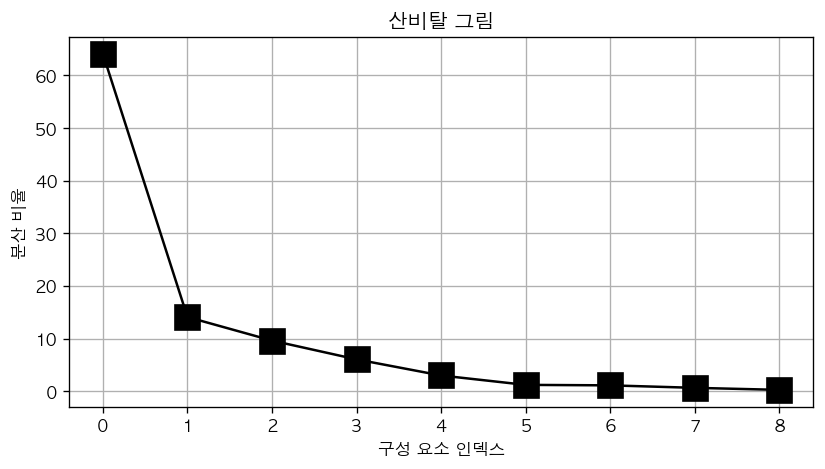

In [19]:
plt.figure(figsize=(8,4))
plt.plot(factorVals,'ks-',markersize=15)
plt.xlabel('구성 요소 인덱스')
plt.ylabel('분산 비율')
plt.title('산비탈 그림')
plt.grid()
plt.show()

In [20]:
print('처음 두 구성 요소의 분산:')
print(np.var(comps,axis=0,ddof=1)) 

print(f'\n처음 두 고윳값:')
print(evals[:2])

처음 두 구성 요소의 분산:
[0.0013006  0.00028585]

처음 두 고윳값:
[0.0013006  0.00028585]


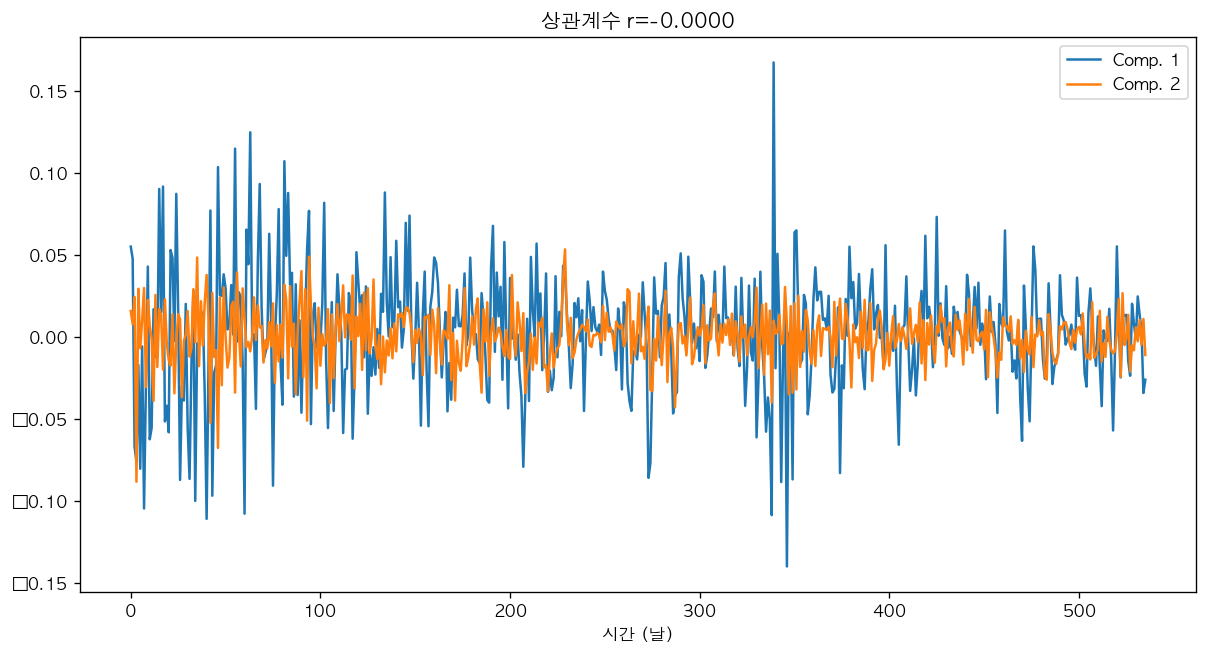

In [21]:
plt.figure(figsize=(12,6))
plt.plot(comps)
plt.xlabel('시간 (날)')
plt.legend(['Comp. 1','Comp. 2'])
plt.title(f'상관계수 r={np.corrcoef(comps.T)[0,1]:.4f}')
plt.show()

/var/folders/5l/0qpcqtys2y3gt3f7421ms_h00000gn/T/ipykernel_63586/713168475.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


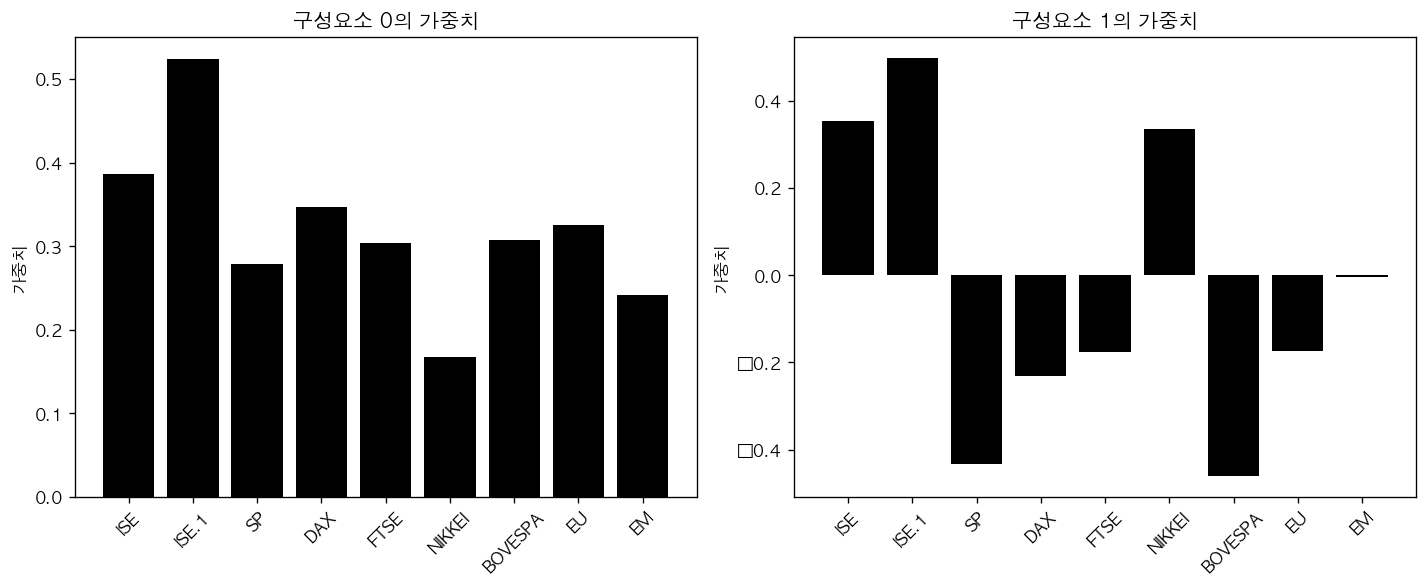

In [22]:

_,axs = plt.subplots(1,2,figsize=(12,5))

for i in range(2):
  axs[i].bar(range(X.shape[1]),evecs[:,i],color='black')
  axs[i].set_xticks(range(X.shape[1]))
  axs[i].set_xticklabels(data.columns,rotation=45)
  axs[i].set_ylabel('가중치')
  axs[i].set_title(f'구성요소 {i}의 가중치')

plt.tight_layout()
plt.show()

/var/folders/5l/0qpcqtys2y3gt3f7421ms_h00000gn/T/ipykernel_63586/4065391105.py:32: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


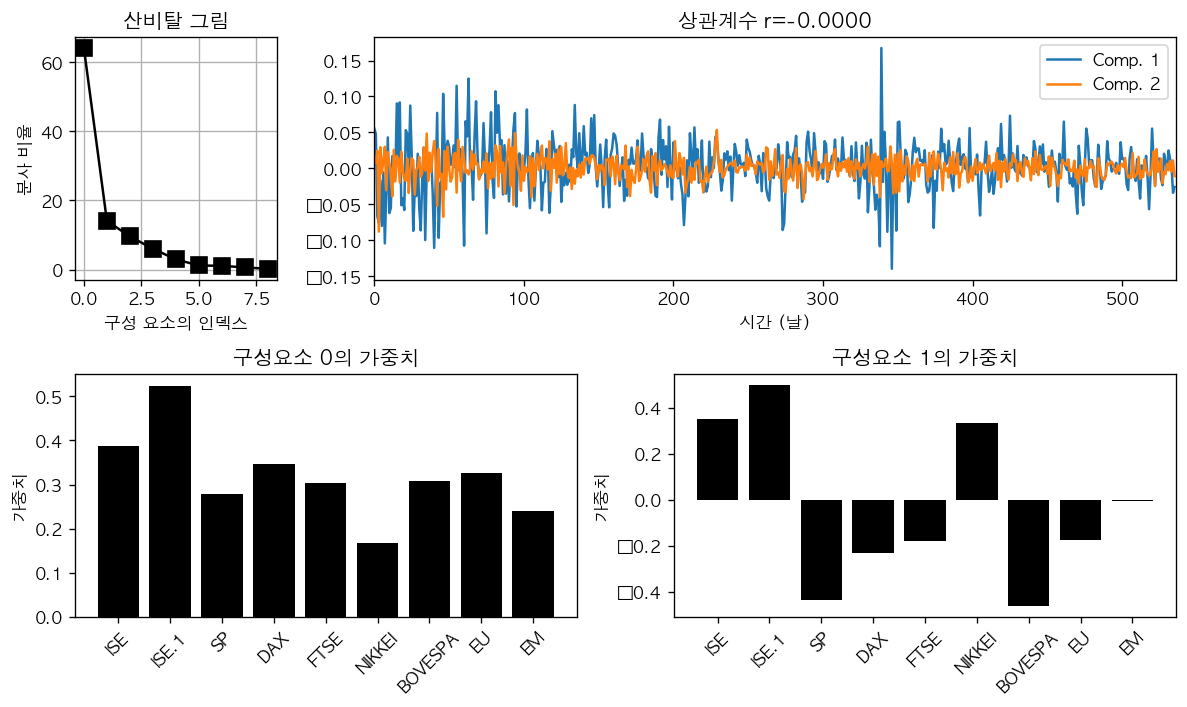

In [24]:
fig = plt.figure(figsize=(10,6))
gs = GridSpec(2,4,figure=fig)

# scree plot
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(factorVals,'ks-',markersize=10)
ax1.set_xlabel('구성 요소의 인덱스')
ax1.set_ylabel('분사 비율')
ax1.set_title('산비탈 그림')
ax1.grid()


# component time series
ax2 = fig.add_subplot(gs[0,1:])
ax2.plot(comps)
ax2.set_xlabel('시간 (날)')
ax2.set_xlim([0,comps.shape[0]])
ax2.legend(['Comp. 1','Comp. 2'])
ax2.set_title(f'상관계수 r={np.corrcoef(comps.T)[0,1]:.4f}')


# bar plots of component loadings
axs = fig.add_subplot(gs[1,:2]), fig.add_subplot(gs[1,2:])
for i in range(2):
  axs[i].bar(range(X.shape[1]),evecs[:,i],color='black')
  axs[i].set_xticks(range(X.shape[1]))
  axs[i].set_xticklabels(data.columns,rotation=45)
  axs[i].set_ylabel('가중치')
  axs[i].set_title(f'구성요소 {i}의 가중치')


plt.tight_layout()
plt.show()

### 14 - 2

In [26]:
U, s, Vt = np.linalg.svd(covmat)

print('eigen value')
print(evals[:4])
print('singular value')
print(s[:4])

고윳값
[0.0013006  0.00028585 0.00019503 0.00012253]
singular value
[0.0013006  0.00028585 0.00019503 0.00012253]


In [27]:
print('eigen vector')
print(evecs[:,0])
print('signular vector')
print(U[:,0])

eigen vector
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]
signular vector
[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
 -0.30741897 -0.32544121 -0.24111348]


In [28]:
U, s, Vt = np.linalg.svd(X)

print('eigen value')
print(evals[:4])
print('singular value')
print(s[:4]**2/(X.shape[0]-1))

print('eigen vector')
print(evecs[:,0])
print('signular vector')
print(Vt[:,0])

eigen value
[0.0013006  0.00028585 0.00019503 0.00012253]
singular value
[0.0013006  0.00028585 0.00019503 0.00012253]
eigen vector
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]
signular vector
[-0.3864847  -0.35298874 -0.33940396  0.14970844  0.06821543 -0.13073363
 -0.39457344  0.63777909 -0.06500667]


### 14 - 5

/Users/marklee/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


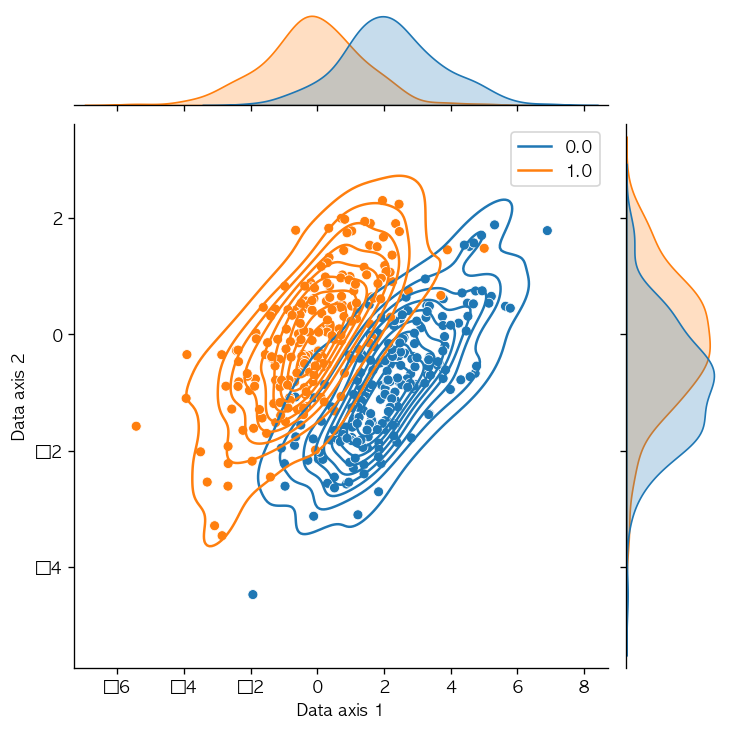

In [30]:
A = np.random.randn(200,2)
A[:,0] += A[:,1]
A += np.array([2,-1])

B = np.random.randn(200,2)
B[:,0] += B[:,1]

data = np.vstack((A,B))
labels  = np.append(np.zeros(200),np.ones(200))


ax = sns.jointplot(x=data[:,0],y=data[:,1],hue=labels)
ax.ax_joint.set_xlabel('Data axis 1')
ax.ax_joint.set_ylabel('Data axis 2')
ax.plot_joint(sns.kdeplot)
plt.show()

### 14 - 6

In [32]:
cv1 = np.cov(A.T,ddof=1)
cv2 = np.cov(B.T,ddof=1)
covW = (cv1+cv2)/2


c1 = np.mean(A, axis = 0)
c2 = np.mean(B, axis = 0)

covB = np.cov(np.stack((c1,c2)).T, ddof = 1)

In [33]:
from scipy.linalg import eigh

evals,evecs = eigh(covB,covW)

sidx  = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]

projA = (data-np.mean(data,axis=0)) @ evecs

/var/folders/5l/0qpcqtys2y3gt3f7421ms_h00000gn/T/ipykernel_63586/3944037403.py:26: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


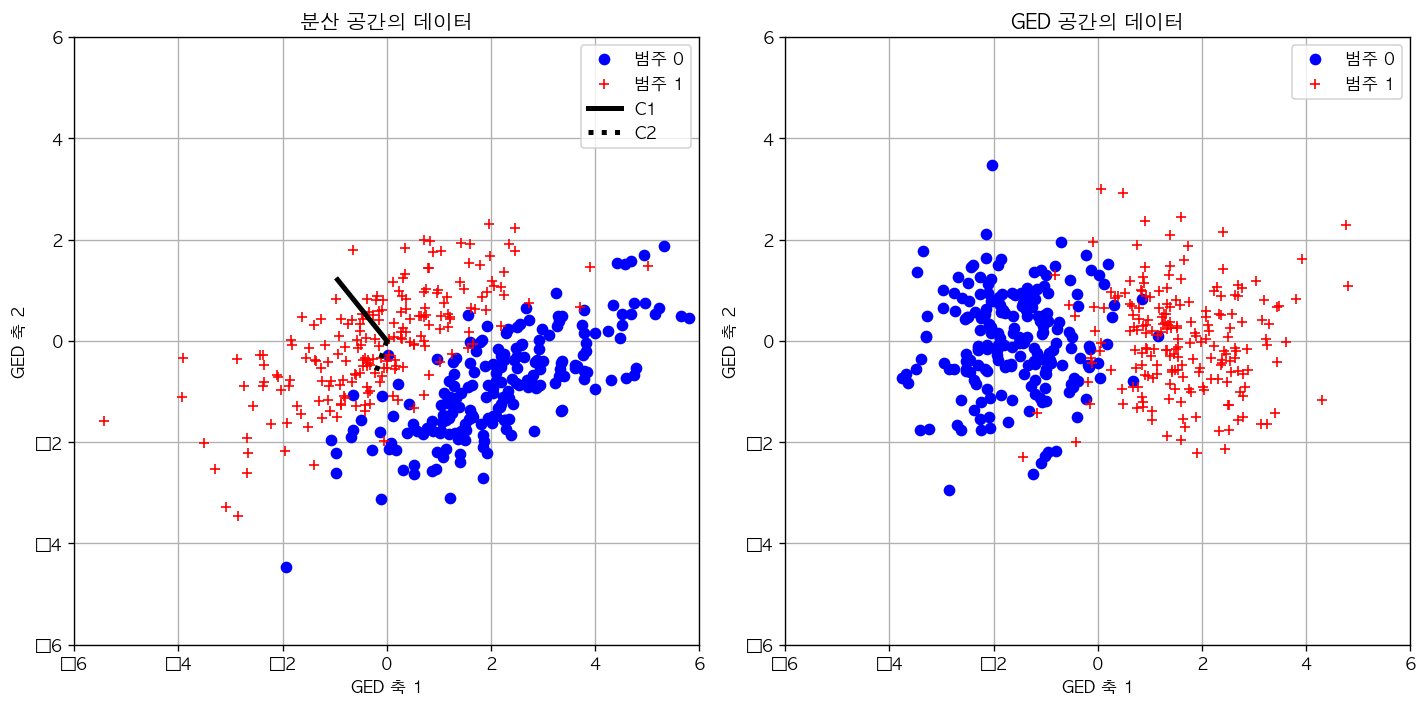

In [37]:
_,axs = plt.subplots(1,2,figsize=(12,6))
marker = ['bo','r+']
for i in range(2):
  axs[0].plot(
      data[labels==i,0],data[labels==i,1],marker[i],label=f'범주 {i}')

axs[0].plot([0,evecs[0,0]],[0,evecs[1,0]],'k-',linewidth=3,label='C1')
axs[0].plot([0,evecs[0,1]],[0,evecs[1,1]],'k:',linewidth=3,label='C2')
axs[0].set_xlabel('GED 축 1')
axs[0].set_ylabel('GED 축 2')
axs[0].set_title('분산 공간의 데이터')

for i in range(2):
  axs[1].plot(projA[labels==i,0],projA[labels==i,1],marker[i],label=f'범주 {i}')
axs[1].set_xlabel('GED 축 1')
axs[1].set_ylabel('GED 축 2')
axs[1].set_title('GED 공간의 데이터')


# common settings
for i in range(2):
  axs[i].axis([-6,6,-6,6])
  axs[i].grid()
  axs[i].legend()

plt.tight_layout()
plt.show()

정확도: 94.0%


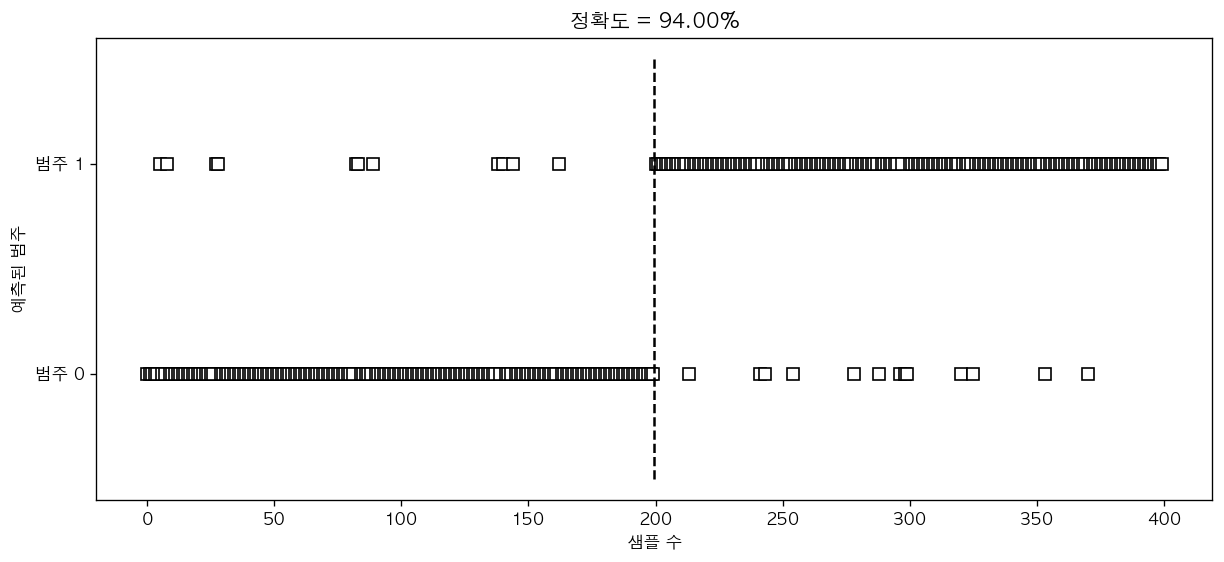

In [39]:
predictedLabel = ( projA[:,0] > 0 )+0 # 오....

print(f'정확도: {100*np.mean( predictedLabel==labels )}%')


plt.figure(figsize=(12,5))
plt.plot(predictedLabel,'ks',markersize=7,markerfacecolor='w',linewidth=2)
plt.plot([200-.5,200-.5],[-.5,1.5],'k--')
plt.xlabel('샘플 수')
plt.ylabel('예측된 범주')
plt.yticks([0,1],labels=['범주 0','범주 1'])
plt.title(f'정확도 = {100*np.mean(predictedLabel==labels):.2f}%')
plt.show()

### 14 - 9

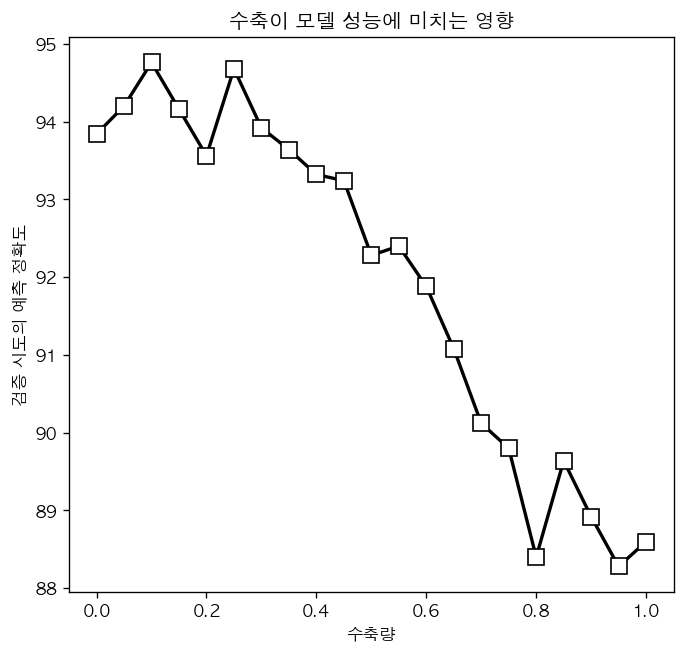

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


shrinkage = np.linspace(0,1,21)
acc = np.zeros(len(shrinkage))


for i,s in enumerate(shrinkage):
    
    lda = LDA(solver='eigen',shrinkage=s)
    
    tmpacc = []
    
    for _ in range(50):

        randorder = np.random.permutation(data.shape[0])

        lda.fit(data[randorder[:350],:],labels[randorder[:350]])

        tmpacc.append(100*np.mean(lda.predict(data[randorder[350:],:])==labels[randorder[350:]]))

    acc[i] = np.mean(tmpacc)


plt.plot(shrinkage,acc,'ks-',markersize=10,markerfacecolor='w',linewidth=2)
plt.xlabel('수축량')
plt.ylabel('검증 시도의 예측 정확도')
plt.title('수축이 모델 성능에 미치는 영향')
plt.show()

수축량이 커질수록 예측 정확도가 낮아지는 것을 알 수 있다.

### 14 - 13

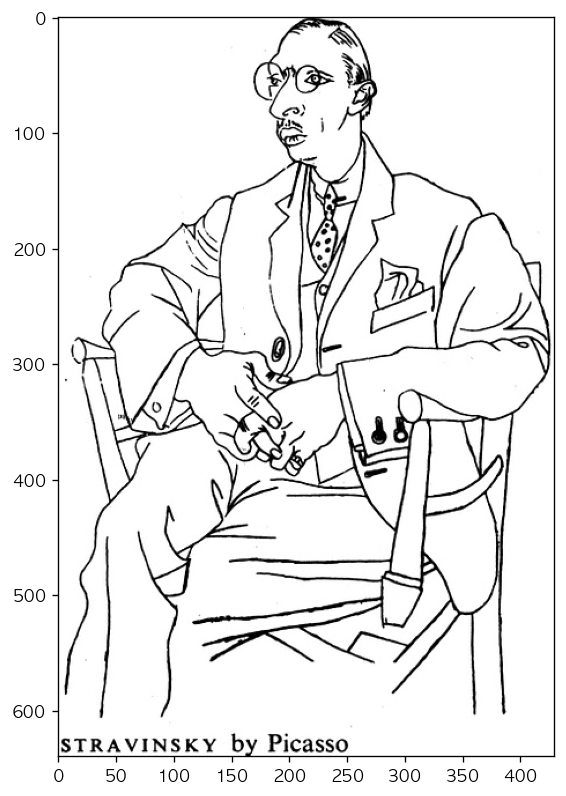

In [45]:
from skimage import io,color
url = 'https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png'

strav = io.imread(url) / 255

plt.figure(figsize=(8,8))
plt.imshow(strav,cmap='gray')
plt.show()

In [46]:
strav.shape

(640, 430)

In [47]:
f = 0.02
theta = np.pi/6

[x,y] = np.meshgrid(np.linspace(-100,100,strav.shape[1]),
                    np.linspace(-100,100,strav.shape[0]))
xp    = x*np.cos(theta) + y*np.sin(theta) #Xcos(theta) + Ysin(theta)

In [48]:
sinimg = np.sin( 2*np.pi*f*xp)

sinimg = (sinimg-np.min(sinimg)) / (np.max(sinimg)-np.min(sinimg)) #잡음 크기를 0에서 1 범위로 조정해준다.

In [49]:
#잡음 추가
stravNoise = strav + sinimg 
stravNoise = stravNoise-np.min(stravNoise)
stravNoise = stravNoise/np.max(stravNoise)

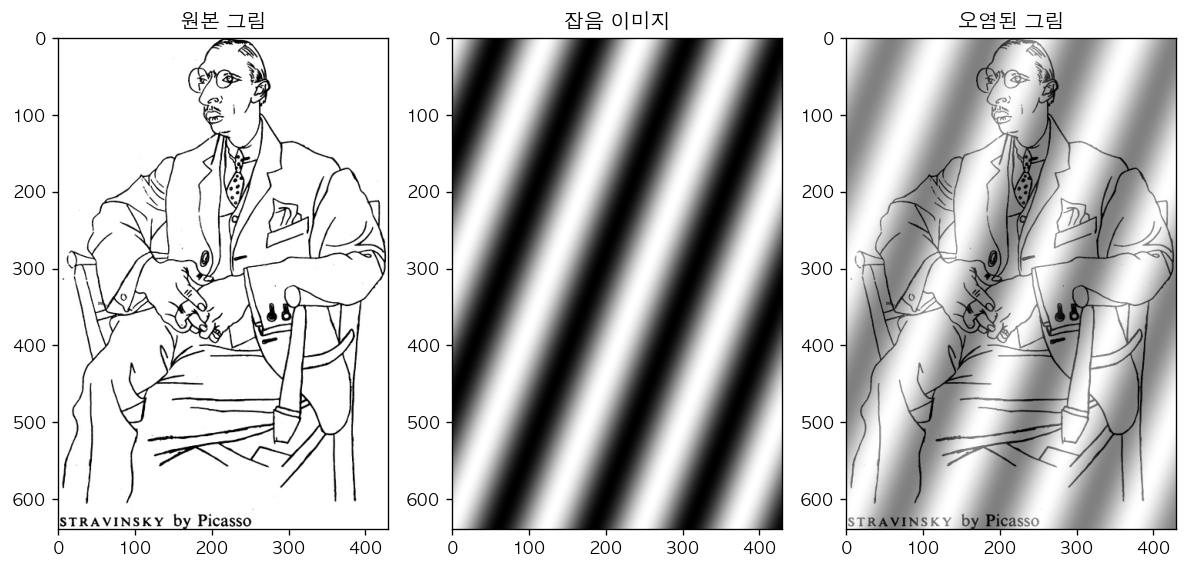

In [50]:
_,axs = plt.subplots(1,3,figsize=(10,7))
axs[0].imshow(strav,cmap='gray')
axs[0].set_title('원본 그림')

axs[1].imshow(sinimg,cmap='gray')
axs[1].set_title('잡음 이미지')

axs[2].imshow(stravNoise,cmap='gray')
axs[2].set_title('오염된 그림')

plt.tight_layout()
plt.show()

In [51]:
#잡음이 있는 그림에 대한 특잇값 분해 수행
Un,sn,Vtn = np.linalg.svd(stravNoise)
Sn = np.zeros_like(stravNoise)
np.fill_diagonal(Sn,sn)

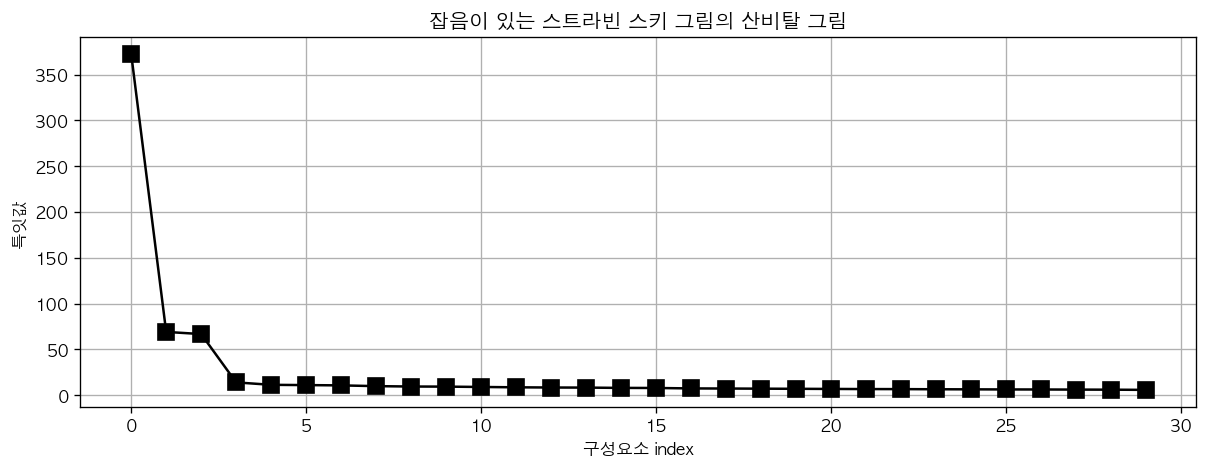

In [52]:
plt.figure(figsize=(12,4))
plt.plot(sn[:30],'ks-',markersize=10)
plt.xlabel('구성요소 index')
plt.ylabel('특잇값')
plt.title('잡음이 있는 스트라빈 스키 그림의 산비탈 그림')
plt.grid()
plt.show()

### 14 - 14  
잡음 제거

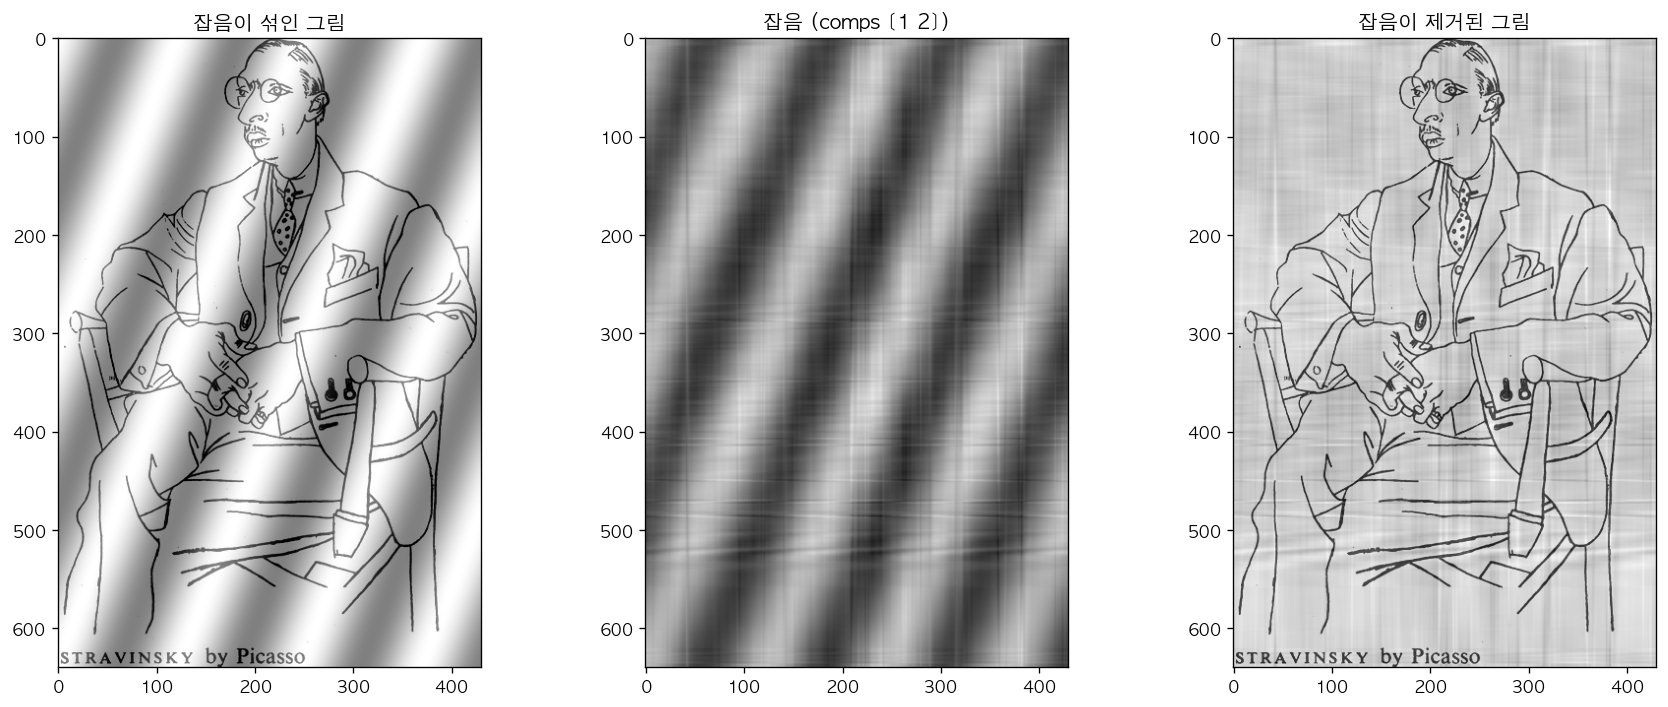

In [55]:
noiseComps = np.array([1,2])

#잡음!
stravRecNoise = Un[:,noiseComps] @ Sn[noiseComps,:][:,noiseComps] @ Vtn[noiseComps,:] #USVt


#잡음 제거 -> 잡음이 포함된 공간을 0으로 채워주는 개념
noNoiseCompsU = np.full(Un.shape[0],True) 
noNoiseCompsU[noiseComps] = False

noNoiseCompsV = np.full(Vtn.shape[0],True)
noNoiseCompsV[noiseComps] = False


#잡음 제거하는 그림
stravRecNoNoise = Un[:,noNoiseCompsU] @ Sn[noNoiseCompsU,:][:,noNoiseCompsV] @ Vtn[noNoiseCompsV,:]




# show the original, reconstructed, and error
_,axs = plt.subplots(1,3,figsize=(15,6))

axs[0].imshow(stravNoise,cmap='gray')
axs[0].set_title('잡음이 섞인 그림')

axs[1].imshow(stravRecNoise,cmap='gray',vmin=-.5,vmax=.5)
axs[1].set_title(f'잡음 (comps {noiseComps})')

axs[2].imshow(stravRecNoNoise,cmap='gray',vmin=.1,vmax=.9)
axs[2].set_title('잡음이 제거된 그림')

plt.tight_layout()
plt.show()